# Exercise 1: Token Count by Word Length

Using gbt4 tokenizer to count the tokens by word lengths

In [1]:
# Importing the libs
import numpy as np
import matplotlib.pyplot as plt
import re
import requests

In [2]:
import tiktoken

In [3]:
# gbt4 tokenizer
tokenizer = tiktoken.get_encoding('cl100k_base')
tokenizer.n_vocab

100277

In [4]:
# The Time Machine book
text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text

# split by punctuation
words = re.split(r'([,.:;—?_!"“()\']|--|\s)',text)
words = [item.strip() for item in words if item.strip()]
print(f'There are {len(words)} words.')

There are 37786 words.


In [5]:
for t in words[:20]:
  print(f'"{t}" has {len(tokenizer.encode(t))} tokens')

"***" has 1 tokens
"START" has 1 tokens
"OF" has 1 tokens
"THE" has 1 tokens
"PROJECT" has 1 tokens
"GUTENBERG" has 5 tokens
"EBOOK" has 2 tokens
"35" has 1 tokens
"***" has 1 tokens
"The" has 1 tokens
"Time" has 1 tokens
"Machine" has 1 tokens
"An" has 1 tokens
"Invention" has 2 tokens
"by" has 1 tokens
"H" has 1 tokens
"." has 1 tokens
"G" has 1 tokens
"." has 1 tokens
"Wells" has 2 tokens


In [6]:
tokens_and_length = np.zeros((len(words),2), dtype=int)

for i,w in enumerate(words):

    tokens = len(tokenizer.encode(w))
    length = len(w)

    tokens_and_length[i,0] = length
    tokens_and_length[i,1] = tokens
print(tokens_and_length.shape)
tokens_and_length[:10]

(37786, 2)


array([[3, 1],
       [5, 1],
       [2, 1],
       [3, 1],
       [7, 1],
       [9, 5],
       [5, 2],
       [2, 1],
       [3, 1],
       [3, 1]])

In [7]:
uniq_token_lengths, uniq_token_counts = np.unique(tokens_and_length[:,0], return_counts=True)
uniq_word_lengths, uniq_word_counts = np.unique(tokens_and_length[:,1], return_counts=True)


In [8]:
print(f"Unique ammount of tokens: {uniq_token_lengths}.")
print(f"Counts: {uniq_token_counts}.")

Unique ammount of tokens: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20].
Counts: [7233 5283 7341 5804 3597 2544 2210 1444 1007  679  278  222   79   44
    9    5    3    2    1    1].


In [9]:
print(f"Unique ammount of word lengths: {uniq_word_lengths}.")
print(f"Counts: {uniq_word_counts}.")

Unique ammount of word lengths: [1 2 3 4 5 6 7].
Counts: [30766  5556  1330   115    16     1     2].


In [10]:
# Adding some noise for better visualization

scatterArray = np.zeros((len(words),2))
n = 15
i = 0
while i<len(words):

    for x,y in tokens_and_length:

        x = x + (np.random.randn()/n)
        y = y + (np.random.randn()/n)

        scatterArray[i,0] = x
        scatterArray[i,1] = y

        i+=1
    
scatterArray[:10]

array([[3.14353807, 0.99503923],
       [5.04888648, 1.08472031],
       [1.88915735, 0.98665657],
       [2.96975124, 0.8978133 ],
       [7.02233361, 0.99652129],
       [8.99900795, 4.90163895],
       [4.90974509, 1.9537027 ],
       [2.07527972, 1.01208213],
       [2.96004387, 1.06645224],
       [2.93388381, 1.02510184]])

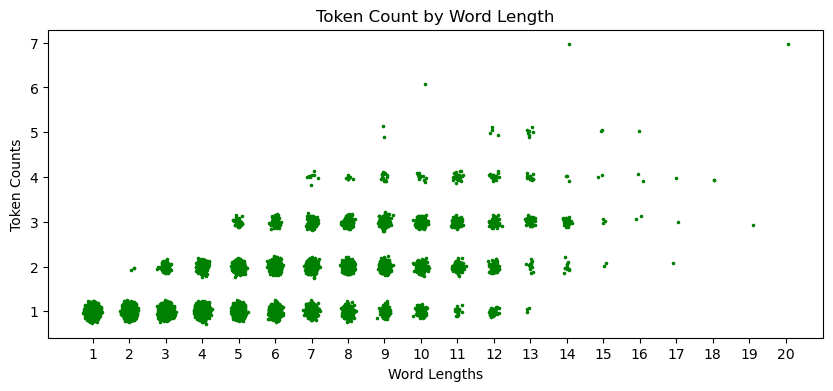

In [11]:
plt.figure(figsize=(10,4))
plt.scatter(scatterArray[:,0],scatterArray[:,1], marker='.', s=10, c="g")
plt.gca().set(xlabel="Word Lengths", ylabel="Token Counts", title="Token Count by Word Length", xticks = np.arange(1,max(uniq_token_lengths)+1))
plt.show()

# Exercise 2: Encoding of 14-Character Words

In [12]:
words_14 = []

for w in words:
    if len(w) == 14:
        words_14.append(w)


for w14 in set(words_14):

    decoded = []
    encoded = tokenizer.encode(w14)
    
    for t in encoded:
        decoded.append( tokenizer.decode([t]) )

    print(f"Tokens of '{w14}': { decoded }")

Tokens of 'Undergrounders': ['Under', 'ground', 'ers']
Tokens of 'safety-matches': ['s', 'afety', '-m', 'atches']
Tokens of 'Psychologist’s': ['Psych', 'ologist', '’s']
Tokens of 'starting-point': ['starting', '-point']
Tokens of 'long-continued': ['long', '-', 'continued']
Tokens of 'Time-Dimension': ['Time', '-D', 'imension']
Tokens of 'ill-controlled': ['ill', '-controlled']
Tokens of 'north-eastward': ['north', '-east', 'ward']
Tokens of 'south-eastward': ['south', '-east', 'ward']
Tokens of 'Nebuchadnezzar': ['N', 'eb', 'uch', 'ad', 'ne', 'zz', 'ar']
Tokens of 'wool-gathering': ['wo', 'ol', '-g', 'athering']
Tokens of 'incredibleness': ['in', 'cred', 'ib', 'leness']
Tokens of 'overwhelmingly': ['over', 'whelming', 'ly']
Tokens of 'differentiated': ['different', 'iated']
Tokens of 'investigations': ['invest', 'ig', 'ations']
Tokens of 'mathematicians': ['math', 'ematic', 'ians']
Tokens of 'constellations': ['const', 'ell', 'ations']
Tokens of 'potentialities': ['potential', 'ities'

# Exercise 3: Token Efficiency

In [13]:
efficiency = np.zeros(len(words))

i = 0
while i<len(words):
    for x,y in tokens_and_length:

        # efficiency = characters / tokens
        # x: lenght (total characters); y: tokens
        efficiency[i] = x/y

        i+=1
ef_idx = np.argmax(efficiency)
ef_chr = words[ef_idx]

inef_idx = np.argmin(efficiency)
inef_chr = words[inef_idx]

print(f"A very efficient word:\n\t'{ef_chr}' has {len(ef_chr)} letters and {len(tokenizer.encode(ef_chr))} tokens.")

print(f"\nAn inefficient word:\n\t'{inef_chr}' has {len(inef_chr)} letters and {len(tokenizer.encode(inef_chr))} tokens.")

A very efficient word:
	'communication' has 13 letters and 1 tokens.

An inefficient word:
	'H' has 1 letters and 1 tokens.


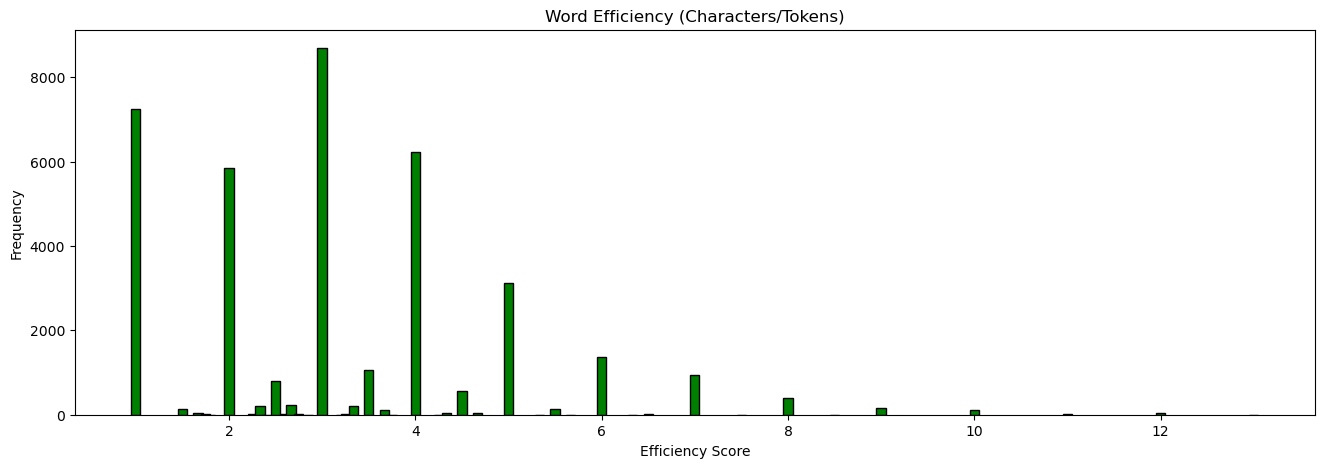

In [14]:
uniq_effs, uniq_effs_counts = np.unique(efficiency, return_counts=True)

plt.figure(figsize=(16,5))
plt.bar(uniq_effs, uniq_effs_counts, edgecolor="k", width=0.1, color="g")
plt.gca().set(xlabel="Efficiency Score", ylabel="Frequency", title="Word Efficiency (Characters/Tokens)" )
plt.show()

In [15]:
print(f"Minimum score: {min(efficiency)}")
print(f"Maximum score: {max(efficiency)}")

Minimum score: 1.0
Maximum score: 13.0


In [16]:
most_effs = np.where(efficiency==13)[0]
least_effs = np.where(efficiency==1)[0]
print(f"Total most efficient words: {len(most_effs)}")
print(f"Total least efficient words: {len(least_effs)}")

Total most efficient words: 3
Total least efficient words: 7236


In [17]:
least_effs

array([   15,    16,    17, ..., 37762, 37765, 37776])

In [18]:
least_effs_chrs = []
for idx in least_effs:
    least_effs_chrs.append(words[idx])

In [19]:
print("MOST EFFICIENT WORDS:")
print(f"'{words[most_effs[0]]}' has {max(efficiency)} characters per token")
print(f"'{words[most_effs[1]]}' has {max(efficiency)} characters per token")

least_effs_chrs = []
for idx in least_effs:
    least_effs_chrs.append(words[idx])

least_effs_chrs_array = np.array(least_effs_chrs)
uniq_least_effs_chrs= np.unique(least_effs_chrs_array)

print("\nLEAST EFFICIENT WORDS:")
for i in uniq_least_effs_chrs:
    print(f"'{i}' has {min(efficiency)} characters per token")

MOST EFFICIENT WORDS:
'communication' has 13.0 characters per token
'advertisement' has 13.0 characters per token

LEAST EFFICIENT WORDS:
'!' has 1.0 characters per token
'(' has 1.0 characters per token
')' has 1.0 characters per token
',' has 1.0 characters per token
'.' has 1.0 characters per token
':' has 1.0 characters per token
';' has 1.0 characters per token
'?' has 1.0 characters per token
'A' has 1.0 characters per token
'D' has 1.0 characters per token
'G' has 1.0 characters per token
'H' has 1.0 characters per token
'I' has 1.0 characters per token
'V' has 1.0 characters per token
'X' has 1.0 characters per token
'XV' has 1.0 characters per token
']' has 1.0 characters per token
'_' has 1.0 characters per token
'a' has 1.0 characters per token
'—' has 1.0 characters per token
'‘I' has 1.0 characters per token
'’' has 1.0 characters per token
'“' has 1.0 characters per token
'”' has 1.0 characters per token
'…' has 1.0 characters per token


# Exercise 4: Tokens in Separated Words vs. Text

In [20]:
# Total unique words in the book

len(set(words))

5007

In [45]:
# The first 10% of GBT4 Tokenizer
first_10per_tokens = []

i = 0
while i<(tokenizer.n_vocab):

    decoded_word = tokenizer.decode([i])
    if decoded_word != '�':
        first_10per_tokens.append(decoded_word)
    i+=1
    
    if len(first_10per_tokens)==tokenizer.n_vocab//10:
        break

print(f"Total words: {len(first_10per_tokens)}")

Total words: 10027


In [22]:
# Decoding the book word by word
word_by_tokens = []
for w in words:
    token = tokenizer.encode(w)
    word_by_tokens.append( token )

word_by_tokens[:10]


[[12488],
 [23380],
 [12766],
 [17673],
 [42555],
 [38, 1406, 965, 9745, 38],
 [36, 37725],
 [1758],
 [12488],
 [791]]

In [119]:
# Chosing a random token from first 10% of GBT4 tokenizer 
randWord = np.random.choice(first_10per_tokens)
randToken = np.array(tokenizer.encode(randWord)).item()

print(f"Token {randToken} is '{randWord}'")

# Finding the token in the book word by word

included_words_by_w = []
for w in word_by_tokens:
    for sub_ws in w:
        if sub_ws == randToken:
            included_words_by_w.append(w)

print(f"\n===> Our manual word split: Token appears {len(included_words_by_w)} times, including:\n-------------------------------")
for i in included_words_by_w:
    print(tokenizer.decode(i))

# Finding the token and its contexts in the book by raw text

all_tokens = np.array(tokenizer.encode(text))
included_words_by_rawT = np.where( all_tokens == randToken)[0]

print(f"\n===> From encoding the full text: Token appears {len(included_words_by_rawT)} times, including:\n-------------------------------")
for i in included_words_by_rawT:
    print( tokenizer.decode( all_tokens[i-5:i+5] ), "\n" )

Token 6875 is ' library'

===> Our manual word split: Token appears 0 times, including:
-------------------------------

===> From encoding the full text: Token appears 1 times, including:
-------------------------------
 might be, even a library! To me, 



# Exercise 5: Do More Frequent Words Have Fewer Tokens?

In [162]:
# Counting uniq words and their tokens

freq_TotTokens_and_TokenID = {}

for idx,w in enumerate(sorted(set(words))):

    freq = text.count(w)
    total_tokens = len(tokenizer.encode(w))

    freq_TotTokens_and_TokenID[w] = {}
    freq_TotTokens_and_TokenID[w]["Frequency"] = freq
    freq_TotTokens_and_TokenID[w]["Total Tokens"] = total_tokens

i = 0
for w in freq_TotTokens_and_TokenID:
    print(f"'{w}' appears {freq_TotTokens_and_TokenID[w]["Frequency"]} times.")
    i+=1
    if i==20:
        break


'!' appears 67 times.
'(' appears 9 times.
')' appears 9 times.
'***' appears 4 times.
',' appears 2250 times.
'.' appears 1804 times.
'35' appears 2 times.
':' appears 39 times.
';' appears 109 times.
'?' appears 96 times.
'A' appears 248 times.
'About' appears 2 times.
'Above' appears 3 times.
'Abruptly' appears 1 times.
'Accordingly' appears 1 times.
'Advancement' appears 1 times.
'Africa' appears 1 times.
'After' appears 11 times.
'Afterwards' appears 2 times.
'Again' appears 2 times.


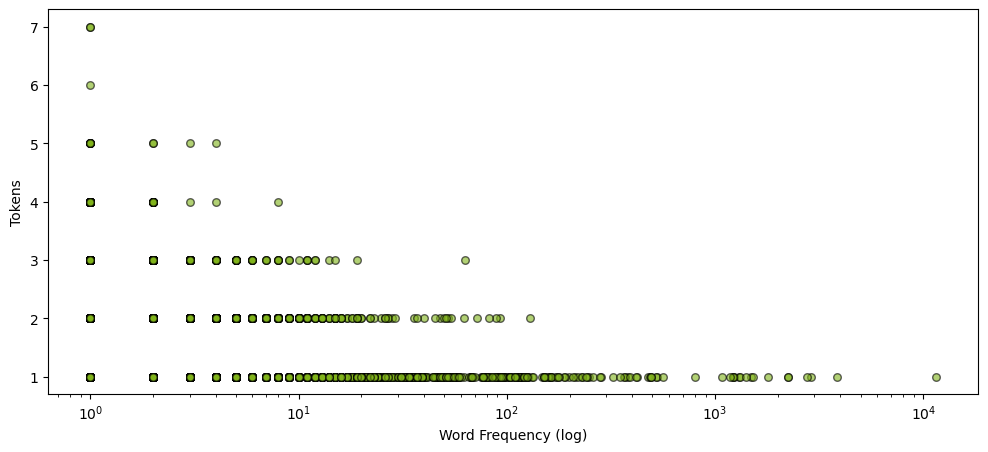

In [196]:
word_freq_tokens = np.zeros((len(freq_TotTokens_and_TokenID),2),dtype=int)

for idx,w in enumerate(freq_TotTokens_and_TokenID):
    word_freq_tokens[idx,0] = freq_TotTokens_and_TokenID[w]["Frequency"]
    word_freq_tokens[idx,1] = freq_TotTokens_and_TokenID[w]["Total Tokens"]

# Making a scatter plot
plt.figure(figsize=(12,5))
plt.scatter(word_freq_tokens[:,0], word_freq_tokens[:,1], s=30, color=[.5,.7,.1], edgecolors="k", alpha=.6)
plt.gca().set(xlabel="Word Frequency (log)", ylabel="Tokens", xscale="log")
plt.show()

# Exercise 6: Fake Words From Real Tokens

In [308]:
# Choosing 3 random token from GBT4 tokenizer and combining them (for fun)

randTok = np.random.choice(tokenizer.n_vocab, size=3)
fakeWords = []

for i in randTok:
    word = tokenizer.decode([i])
    print(f"Token {i} is '{word}'")
    fakeWords.append(word)

print(f"\nThe fake word is '{"".join(fakeWords)}'")


Token 2081 is 'escription'
Token 34408 is '.Stream'
Token 60719 is 'zers'

The fake word is 'escription.Streamzers'
